In [37]:
%matplotlib inline

from skbio import TabularMSA, Protein
import matplotlib.pyplot as plt 
import numpy as np 
import pandas 

plt.style.use('ggplot')

In [38]:
msa = TabularMSA.read('aln.fa', constructor=Protein)
msa.reassign_index(minter='id')
bglb_index = [n for n, j in enumerate(msa.loc['P22505_BGLB_PAEPO']) if str(j) != '-']

In [39]:
not_degen = []
for i, n in enumerate(msa):
    if not n.has_degenerates():
        not_degen.append(i)

In [40]:
msa = msa.iloc[not_degen,bglb_index]

In [41]:
msa.shape

Shape(sequence=2694, position=448)

In [42]:
con = msa.conservation(gap_mode='include')
len(con)

448

(array([ 30.,  73.,  89.,  57.,  58.,  37.,  32.,  29.,  22.,  21.]),
 array([ 0.08666459,  0.17585655,  0.26504851,  0.35424046,  0.44343242,
         0.53262438,  0.62181634,  0.7110083 ,  0.80020025,  0.88939221,
         0.97858417]),
 <a list of 10 Patch objects>)

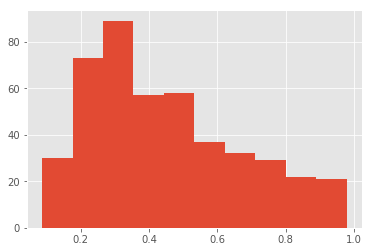

In [43]:
fig, ax = plt.subplots()
ax.hist(con)

In [44]:
con.max(), con.min(), con.mean(), con.std()

(0.97858416889564537,
 0.086664589528198221,
 0.44828096136169177,
 0.2222155018022991)

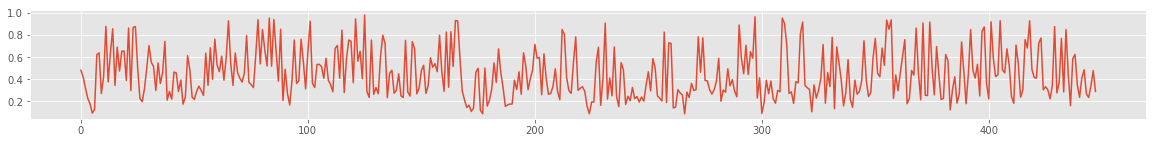

In [45]:
fig, ax = plt.subplots(figsize=(20,2))
ax.plot(range(len(con)), con)

In [46]:
con[166]

0.92448484507261464

In [48]:
np.unique(msa.loc[:, 166], return_counts=1)

(array([b'-', b'A', b'D', b'E', b'G', b'K', b'N', b'P', b'Q', b'S', b'T',
        b'V'], 
       dtype='|S1'),
 array([  12,    7,   11, 2587,    1,    1,    5,    2,   59,    5,    2,
           2]))

In [49]:
np.unique(msa.loc[:, 355], return_counts=1)

(array([b'-', b'A', b'D', b'E', b'G', b'K', b'N', b'P', b'Q', b'R', b'S',
        b'T', b'V', b'Y'], 
       dtype='|S1'),
 array([  26,    6,   12, 2612,    3,    4,    3,    5,    2,    6,    6,
           5,    2,    2]))

In [57]:
distance = pandas.read_csv('../data_sets/reference_material/all_reference_data.csv', index_col=0)
distance.head()

,distance
name,
N1A,31.287584
N1C,31.287584
N1D,31.287584
N1E,31.287584
N1F,31.287584


In [65]:
distance.shape

(8880, 1)

In [71]:
from Bio import SeqIO 

# Collect all togethr and make a DataFrame 

# 1. conservation
# 2. distance from active site 
# 3. ? 

def build_data():
    seq = next(SeqIO.parse('../data_sets/reference_material/sequence/bglb_model.fa', 'fasta'))
    for n, letter in enumerate(seq.seq, 1):
        if n < 444:
            for designed in np.unique(seq.seq):
                name = '{}{}{}'.format(letter, n, designed)
                yield name, con[n+2], distance.loc[name]['distance'], 0 
            
columns = ['name', 'conserved', 'distance', 'dummy']
df = pandas.DataFrame(build_data(), columns=columns)
df.set_index('name', inplace=1)
df.head()

,conserved,distance,dummy
name,,,
N1A,0.228111,31.287584,0
N1C,0.228111,31.287584,0
N1D,0.228111,31.287584,0
N1E,0.228111,31.287584,0
N1F,0.228111,31.287584,0


In [72]:
df.to_csv('../data_sets/add_features.csv')

! ls ../data_sets/

Untitled.ipynb          data_set_folder         raw_files
add_features.csv        experimental_data       reference_material
bglb_ML_targets.csv     family_1_in_freezer     speculative_targets.csv
bglb_data_set.csv       family_data_set         thermal_targets.csv
bglb_targets.csv        family_data_set.csv     xiokang_predictions.csv
create_ML_targets.ipynb names.csv
